In [4]:
import torch

In [5]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [6]:
num_imputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_imputs,dtype=torch.float32)
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += torch.tensor(np.random.normal(0,0.01,size = labels.size()),dtype=torch.float32)

In [7]:
print(features.shape)

torch.Size([1000, 2])


In [8]:
print(features[0],labels[0])

tensor([-0.9042, -1.4811]) tensor(7.4281)


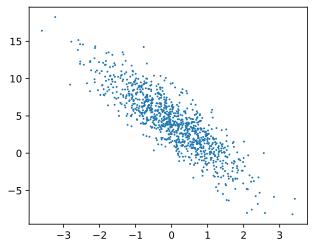

In [9]:
def use_svg_diplay():
    #矢量图显示
     display.set_matplotlib_formats('svg')


def set_figzise(figsize = (5, 4)):
     use_svg_diplay()
     plt.rcParams['figure.figsize'] = figsize
# import sys
# sys.path.append('..')
# import d2lzh_pytorch

    
set_figzise()
plt.scatter(features[:,1].numpy(), labels.numpy(),1)

In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i:min(i + batch_size,num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [11]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.6648, -1.7604],
        [ 0.3130, -0.1821],
        [ 1.3000,  0.6847],
        [ 1.5251, -0.5632],
        [-0.2510, -0.5334],
        [-0.7826, -1.1004],
        [ 0.3783, -0.7324],
        [ 0.1866,  1.0621],
        [ 0.5427,  0.2588],
        [-0.5905, -0.5082]]) tensor([8.8617, 5.4536, 4.4791, 9.1721, 5.5093, 6.3805, 7.4477, 0.9624, 4.3963,
        4.7282])


In [12]:
w = torch.tensor(np.random.normal(0, 0.01,(num_imputs,1)),dtype = torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [13]:
w.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)

tensor([0.], requires_grad=True)

In [14]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [15]:
def squsred_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [16]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [22]:
lr = 0.00001
num_epochs = 1000
net = linreg
loss = squsred_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward() #小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)
        
        #梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss= %f' % (epoch + 1,train_l.mean().item()))
        

epoch 1, loss= 0.000048
epoch 2, loss= 0.000048
epoch 3, loss= 0.000048
epoch 4, loss= 0.000048
epoch 5, loss= 0.000048
epoch 6, loss= 0.000048
epoch 7, loss= 0.000048
epoch 8, loss= 0.000048
epoch 9, loss= 0.000048
epoch 10, loss= 0.000048
epoch 11, loss= 0.000048
epoch 12, loss= 0.000048
epoch 13, loss= 0.000048
epoch 14, loss= 0.000048
epoch 15, loss= 0.000048
epoch 16, loss= 0.000048
epoch 17, loss= 0.000048
epoch 18, loss= 0.000048
epoch 19, loss= 0.000048
epoch 20, loss= 0.000048
epoch 21, loss= 0.000048
epoch 22, loss= 0.000048
epoch 23, loss= 0.000048
epoch 24, loss= 0.000048
epoch 25, loss= 0.000048
epoch 26, loss= 0.000048
epoch 27, loss= 0.000048
epoch 28, loss= 0.000048
epoch 29, loss= 0.000048
epoch 30, loss= 0.000048
epoch 31, loss= 0.000048
epoch 32, loss= 0.000048
epoch 33, loss= 0.000048
epoch 34, loss= 0.000048
epoch 35, loss= 0.000048
epoch 36, loss= 0.000048
epoch 37, loss= 0.000048
epoch 38, loss= 0.000048
epoch 39, loss= 0.000048
epoch 40, loss= 0.000048
epoch 41,

In [23]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 2.0001],
        [-3.3999]], requires_grad=True)
4.2 
 tensor([4.2000], requires_grad=True)
